<a href="https://colab.research.google.com/github/chanjiaming/Airost_intern_project_team_tom_and_jerry/blob/main/UNO_Card_Detection_using_YOLOv8_OBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AIROST Workshop UNO Card Detection using YOLOv8

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train a YOLOv8 Oriented Bounding Boxes Model

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/yolov8-keypoint-detection-custom-train)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

In this guide, we will walk through how to train a YOLOv8 oriented bounding box detection model.

If you notice that our notebook behaves incorrectly, let us know by [opening an issue on the Roboflow Notebooks repository](https://github.com/roboflow/notebooks/issues).

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading our [YOLOv8 oriented bounding box training blog post](https://blog.roboflow.com/train-yolov8-obb-model/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Checking that our Colab environment has a GPU
- Installing YOLOv8
- Preparing a dataset
- Training a YOLOv8 OBB model
- Running inference on our model

Without further ado, let's get started!

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Mar  5 13:24:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [ ]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.23 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Universe

Need data for your project? Check out Roboflow Universe, a repository of open source computer vision datasets. You can export any dataset labeled for instance segmentation as a YOLOv8 Oriented Bounding Boxes dataset for use in training a YOLOv8 Oriented Bounding Boxes model.

[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



# UNO Card Detection

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="WmSdsuaPw9XPelzfpU18")
project = rf.workspace("joseph-nelson").project("uno-cards")
dataset = project.version(1).download("yolov8-obb")

import yaml

with open(f'{dataset.location}/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset.location

with open(f'{dataset.location}/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Uno-Cards-1 in yolov8-obb:: 100%|██████████| 43176/43176 [00:08<00:00, 5168.18it/s]


## Train a YOLOv8 OBB UNO Card Detection Model

With our dataset downloaded, we can now train a YOLOv8 OBB UNO Card detection model. Run the code snippet below to start training your model:

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=416)

100%|██████████| 6.24M/6.24M [00:00<00:00, 304MB/s]

Ultralytics YOLOv8.1.23 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/datasets/Uno-Cards-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

100%|██████████| 755k/755k [00:00<00:00, 102MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 252MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Uno-Cards-1/train/labels... 18885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18885/18885 [00:11<00:00, 1616.16it/s]


train: New cache created: /content/datasets/Uno-Cards-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/Uno-Cards-1/valid/labels... 1798 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1798/1798 [00:01<00:00, 1162.19it/s]

val: New cache created: /content/datasets/Uno-Cards-1/valid/labels.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.21G     0.8273      1.796      1.159         16        416: 100%|██████████| 1181/1181 [04:38<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:17<00:00,  6.34it/s]

                   all       1798       5394      0.952      0.953      0.987      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.08G     0.5359     0.5664      1.014         20        416: 100%|██████████| 1181/1181 [04:28<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:17<00:00,  6.47it/s]

                   all       1798       5394      0.991      0.991      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.08G     0.4936      0.457      0.996         26        416: 100%|██████████| 1181/1181 [04:25<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:18<00:00,  6.14it/s]

                   all       1798       5394      0.996      0.997      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.08G     0.4739      0.412     0.9895         14        416: 100%|██████████| 1181/1181 [04:22<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:17<00:00,  6.48it/s]

                   all       1798       5394      0.997      0.997      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.08G     0.4475     0.3753     0.9796         18        416: 100%|██████████| 1181/1181 [04:25<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:18<00:00,  6.18it/s]


                   all       1798       5394      0.997      0.999      0.995      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.07G     0.4339     0.3545     0.9763         28        416: 100%|██████████| 1181/1181 [04:22<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:17<00:00,  6.44it/s]

                   all       1798       5394      0.998      0.999      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.08G     0.4251     0.3392     0.9746         22        416: 100%|██████████| 1181/1181 [04:29<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:18<00:00,  6.01it/s]

                   all       1798       5394      0.999      0.999      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.08G     0.4167     0.3293     0.9755         18        416: 100%|██████████| 1181/1181 [04:32<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:18<00:00,  5.99it/s]

                   all       1798       5394      0.999      0.998      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.09G     0.4117      0.319     0.9717         22        416: 100%|██████████| 1181/1181 [04:28<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:19<00:00,  5.90it/s]

                   all       1798       5394      0.999      0.999      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.07G     0.4047     0.3097     0.9701         22        416: 100%|██████████| 1181/1181 [04:31<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:18<00:00,  5.99it/s]

                   all       1798       5394      0.999      0.999      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.08G     0.4017     0.3045     0.9703         18        416: 100%|██████████| 1181/1181 [04:32<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:19<00:00,  5.92it/s]

                   all       1798       5394      0.999      0.999      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.09G     0.3974     0.3023     0.9658         25        416: 100%|██████████| 1181/1181 [04:33<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:19<00:00,  5.88it/s]

                   all       1798       5394      0.999      0.999      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.08G     0.3922     0.2948     0.9655         25        416: 100%|██████████| 1181/1181 [04:39<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:18<00:00,  6.21it/s]

                   all       1798       5394      0.999      0.999      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.07G     0.3908     0.2941     0.9639         15        416: 100%|██████████| 1181/1181 [04:33<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:17<00:00,  6.42it/s]

                   all       1798       5394      0.999          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.08G     0.3885     0.2881     0.9668         21        416: 100%|██████████| 1181/1181 [04:28<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:17<00:00,  6.37it/s]

                   all       1798       5394      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.08G     0.3843     0.2837      0.963         21        416: 100%|██████████| 1181/1181 [04:25<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [00:18<00:00,  6.08it/s]


                   all       1798       5394          1          1      0.995      0.971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.03G     0.3824     0.2825     0.9596         81        416:   3%|▎         | 31/1181 [00:06<03:59,  4.81it/s]


KeyboardInterrupt: 

Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the OBB UNO Card Detection Model

Let's test our OBB UNO Card detection model on an image:

In [ ]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/datasets/Uno-Cards-1/test/images/388878466_jpg.rf.ce5b9495e1999944e8c7d04a3cc20284.jpg: 416x416 12.7ms
Speed: 0.8ms preprocess, 12.7ms inference, 3.8ms postprocess per image at shape (1, 3, 416, 416)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: '0', 1: '1', 2: '10', 3: '11', 4: '12', 5: '13', 6: '14', 7: '2', 8: '3', 9: '4', 10: '5', 11: '6', 12: '7', 13: '8', 14: '9'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[ 22,  67, 158],
        [ 15,  62, 153],
        [ 13,  63, 151],
        ...,
        [ 12,  45,  95],
        [  0,  32,  80],
        [  0,  26,  72]],

       [[ 16,  64, 152],
        [ 10,  60, 148],
        [ 11,  65, 150],
        ...,
        [  8,  43,  93],
        [  0,  34,  82],
        [  0,  32,  77]],

       [[ 10,  64, 147],
        [  3,  59, 141],
        [  5,  64, 144],
        ...,
        [  7,  42,  92],
        [  0,  38,  86],
        [  0,  40,  8

We can visualize our oriented bounding box predictions using the following code:

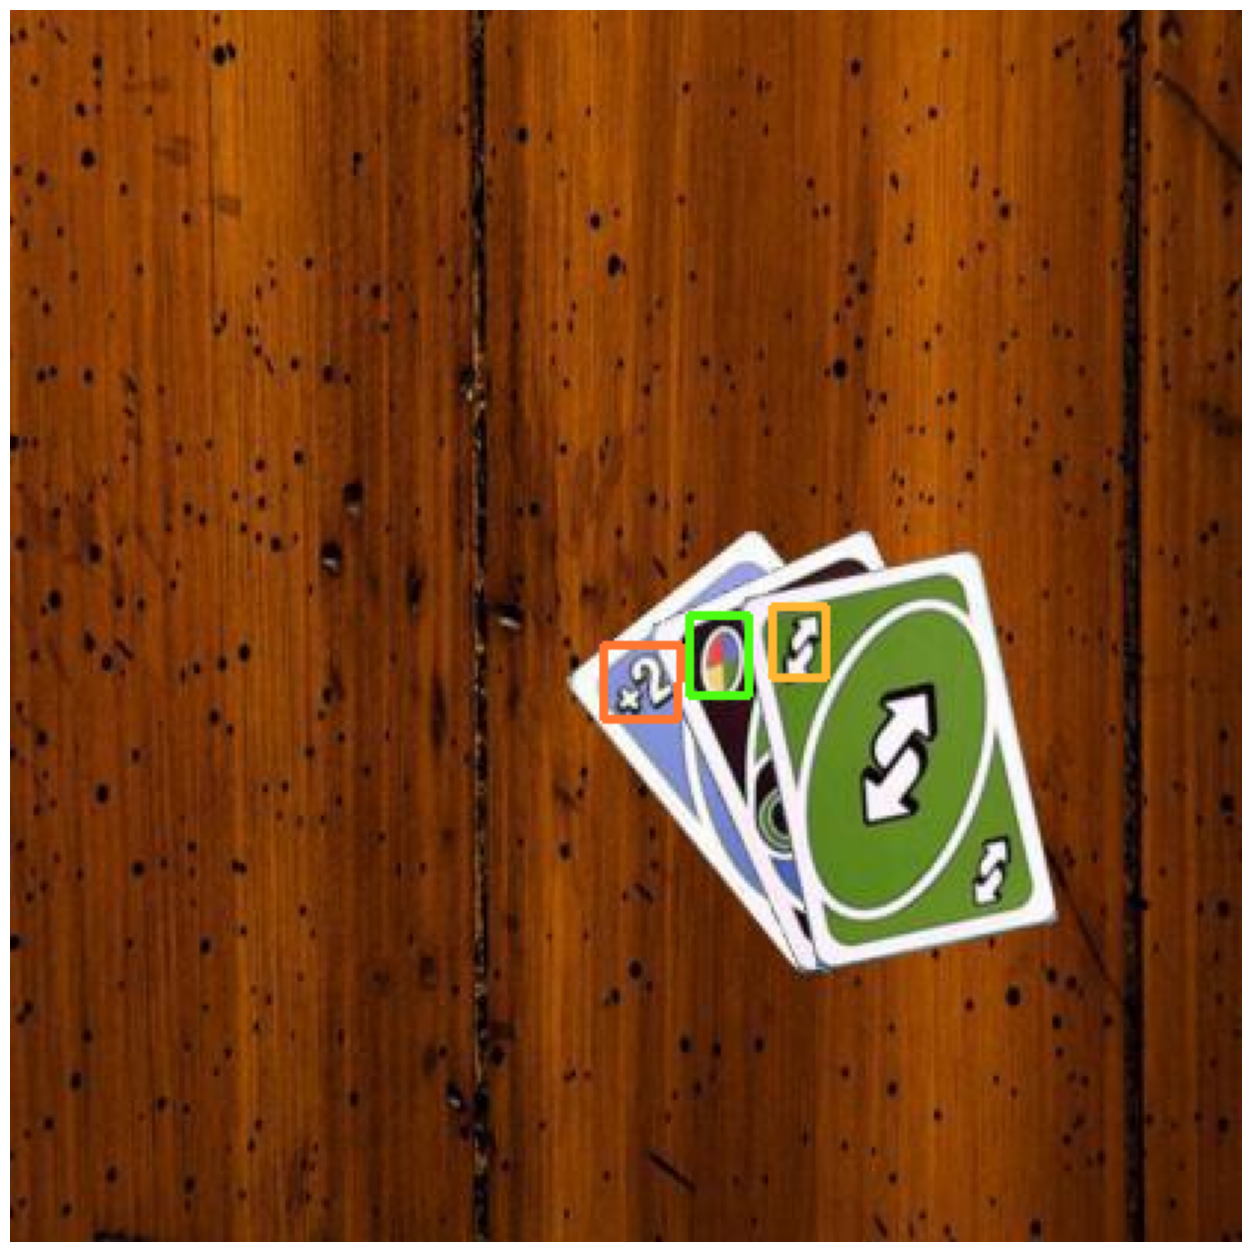

In [ ]:
# !pip install supervision -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

Our model successfully identified the location of solar panels in the image. All solar panels have an oriented bounding box that fit the panel closely.

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.